# **Intro mxnet NDArray, Symbol, Model**
* 목표 : 
  * mxnet의 NDArray 실습해보기
  * Symbolic model
  * mx.mod.Module을 이용한 훈련하기
* 출처 : https://mxnet.incubator.apache.org/tutorials/basic/ndarray.html / http://www.popit.kr/

## **1. Intro MXNet NDArray**
* NDArray : the core data structure for all mathematical computations.
  * similar to **numpy.ndarray**
* key advantages
  * CPU, GPU, multi-GPU 연산
  * 분산 학습 지원
  * 멀티 클라이언트 프로그래밍 지원

### create an NDArray.

In [1]:
import mxnet as mx
from mxnet import nd

import numpy as np

In [2]:
# 1차원 배열 
a = nd.array([1,2,3])
print(a.asnumpy()) #mxnet -> numpy

[ 1.  2.  3.]


In [3]:
{'a.shape':a.shape,'a.type':a.dtype} 

{'a.shape': (3,), 'a.type': numpy.float32}

In [4]:
# 기본 배열 타입은 numpy.float32, 배열 생성시 배열 타입을 지정 가능(dtype=__)
a = nd.array([1, 2, 3], dtype=np.int32)
print(a.dtype)

<class 'numpy.int32'>


In [5]:
# 2차원 배열
b = nd.array([[1,2,3], [2,3,4]])
print(b.asnumpy())

[[ 1.  2.  3.]
 [ 2.  3.  4.]]


In [6]:
{'b.shape':b.shape,'b.type':b.dtype}

{'b.shape': (2, 3), 'b.type': numpy.float32}

### special initializers

In [7]:
nd.zeros((2,3))


[[ 0.  0.  0.]
 [ 0.  0.  0.]]
<NDArray 2x3 @cpu(0)>

In [8]:
nd.ones((2,3))


[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>

In [9]:
nd.full((2,3), 7)


[[ 7.  7.  7.]
 [ 7.  7.  7.]]
<NDArray 2x3 @cpu(0)>

In [10]:
#random value : a standard normal distribution with zero mean and unit variance.
nd.random_normal(0, 1, shape=(3, 4))


[[ 0.23107235  0.30030754 -0.32433933  1.04932892]
 [ 0.73686236 -0.0097888   0.46656415  1.72023427]
 [ 0.87809837 -1.07333767 -0.8692565  -0.26717702]]
<NDArray 3x4 @cpu(0)>

### reshape 
: 원본 메모리의 데이터는 그대로 둔 채 형태만 변경

In [12]:
a = nd.array(np.arange(24))
print(a.asnumpy())

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.]


In [13]:
b = a.reshape((2, 3, 4)) #channel, row, col
print(b.asnumpy())

[[[  0.   1.   2.   3.]
  [  4.   5.   6.   7.]
  [  8.   9.  10.  11.]]

 [[ 12.  13.  14.  15.]
  [ 16.  17.  18.  19.]
  [ 20.  21.  22.  23.]]]


### Basic Operations

In [14]:
a = nd.ones((2,3))
b = nd.ones((2,3))
c = a + b
print(c.asnumpy())
d = a - b
print(d.asnumpy())

[[ 2.  2.  2.]
 [ 2.  2.  2.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [15]:
# elementwise pow and sin, and then transpose
d = nd.sin(c**2).T
# elementwise max
f = nd.maximum(a, c)
f.asnumpy()

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.]], dtype=float32)

### Indexing and Slicing

In [16]:
a = nd.array(np.arange(6).reshape(3, 2))
print(a.asnumpy())

[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]]


In [17]:
# indexing
a[0][1]  #(1,2)요소


[ 1.]
<NDArray 1 @cpu(0)>

In [18]:
a[1:2] = 1 #2nd row에 1 입력
a[:].asnumpy()

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 4.,  5.]], dtype=float32)

In [19]:
# slicing
print(a[1:2].asnumpy()) #2nd row

[[ 1.  1.]]


In [20]:
# slice with particular axis(axis=0)
d = nd.slice_axis(a, axis=0, begin=1, end=2) 
d.asnumpy()

array([[ 1.,  1.]], dtype=float32)

In [21]:
# using another axis(axis=1)
d = nd.slice_axis(a, axis=1, begin=1, end=2)
d.asnumpy()

array([[ 1.],
       [ 1.],
       [ 5.]], dtype=float32)

### concatenate

In [22]:
a = nd.ones((2, 3))
b = nd.ones((2, 3)) * 2
print(a.asnumpy())
print(b.asnumpy())

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 2.  2.  2.]
 [ 2.  2.  2.]]


In [23]:
c = nd.concatenate([a, b]) #기본 axis는 0(세로 결합)
print(c.asnumpy())

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


In [24]:
# concatenate with a particular axis(가로 결합)
c = nd.concatenate([a, b], axis=1)
print(c.asnumpy())

[[ 1.  1.  1.  2.  2.  2.]
 [ 1.  1.  1.  2.  2.  2.]]


### Reduce : scalar 값으로 변환

In [25]:
a = nd.ones((2, 3))
print(a.asnumpy())

[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [26]:
b = nd.sum(a)
print(b.asnumpy())

[ 6.]


In [27]:
# reduce along a particular axis
c = nd.sum_axis(a, axis=0) # 세로 합
print(c.asnumpy())

[ 2.  2.  2.]


In [28]:
c = mx.nd.sum_axis(a, axis=1) # 가로 합
print(c.asnumpy())

[ 3.  3.]


### GPU Support

In [29]:
# CPU/GPU간 스위치는 context를 기반으로 하며, 여러개인 경우 CPU/GPU 숫자를 입력
# -> Google Cloud Platform 이용하기
a = nd.ones((100, 100), mx.cpu(0))
b = nd.ones((100, 100), mx.gpu(0))
print(a)
print(b)

MXNetError: [23:44:10] src/imperative/imperative.cc:78: Operator _ones is not implemented for GPU.

Stack trace returned 6 entries:
[bt] (0) 0   libmxnet.so                         0x00000001054f5b98 _ZN4dmlc15LogMessageFatalD2Ev + 40
[bt] (1) 1   libmxnet.so                         0x000000010646bcd4 _ZN5mxnet10Imperative8InvokeOpERKNS_7ContextERKN4nnvm9NodeAttrsERKNSt3__16vectorIPNS_7NDArrayENS8_9allocatorISB_EEEESG_RKNS9_INS_9OpReqTypeENSC_ISH_EEEENS_12DispatchModeENS_10OpStatePtrE + 1972
[bt] (2) 2   libmxnet.so                         0x000000010646f8da _ZN5mxnet10Imperative6InvokeERKNS_7ContextERKN4nnvm9NodeAttrsERKNSt3__16vectorIPNS_7NDArrayENS8_9allocatorISB_EEEESG_ + 794
[bt] (3) 3   libmxnet.so                         0x00000001063f0667 _Z22MXImperativeInvokeImplPviPS_PiPS0_iPPKcS5_ + 391
[bt] (4) 4   libmxnet.so                         0x00000001063f1834 MXImperativeInvokeEx + 164
[bt] (5) 5   _ctypes.cpython-36m-darwin.so       0x00000001045df2c7 ffi_call_unix64 + 79


## **2. Symbol - Neural network graphs and auto-differentiation**

* MXNet provides the **Symbol API**, an interface for symbolic programming.
* MXNet’s Symbol API is similar to the network configurations used by **Caffe** and the symbolic programming in **Theano.**
* symbolic approach : we can optimize our functions before using them.

### Imperative vs. Symbolic
* mxnet은 imperative 모델과 Symbolic 모델 모두 가능

#### 1) Imperative model
* 장점) 기반 프로그래밍 모델의 구문을 모두 활용 가능하여 좀 더 유연하며, 디버깅이 용이

In [33]:
# Imperative 모델은 일반적인 프로그래밍 모델
a = nd.array([1, 2, 3])
b = a * 2 + 1
print(b.asnumpy())

[ 3.  5.  7.]


#### 2) Symbolic model
* (1) 심볼을 이용하여 오퍼레이션에 대한 그래프를 먼저 정의한 후,
* (2) 그래프에 실제값을 바인딩하여 실행시키는 과정을 거침. 
* 즉, 오퍼레이션을 정의하는 과정과 오퍼레이션을 실행하는 단계가 분리
----
* 단점) 기반 프로그래밍 요소를 사용할 수 없으며, 주어진 심볼릭 구분만을 이용해야 하므로 제약이 따른다.
* 장점) 메모리 재사용이 가능하고 실행 과정이 최적화

In [34]:
#위 내용을 symbolic 코드로 구현
#1)먼저 심볼을 기반으로 computation graph를 구성
a = mx.sym.Variable('a')
b = a * 2 + 1
print(a)
print(b)

<Symbol a>
<Symbol _plusscalar0>


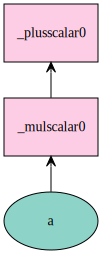

In [35]:
# Plot computation graph
mx.viz.plot_network(symbol=b)

In [36]:
#2) 그래프에 실제 값은 bind
ex = b.bind(ctx=mx.cpu(), args={'a': nd.array([1, 2, 3])}) #a값 입력
# Execute computation graph
ex.forward()

[
 [ 3.  5.  7.]
 <NDArray 3 @cpu(0)>]

In [140]:
print(ex.outputs)

[
[ 3.  5.  7.]
<NDArray 3 @cpu(0)>]


In [142]:
print(ex.outputs[0].asnumpy()) #imperative 모델과 동일한 결과

[ 3.  5.  7.]


### Basic Neural Networks 만들기

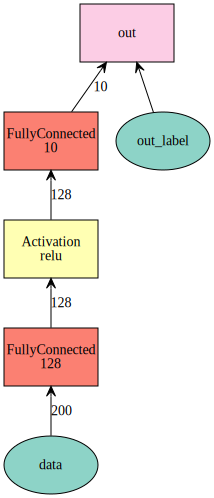

In [37]:
#2개의 레이어로 구성된 MLP(Multi Layer Perceptron)을 구성
#(error 발생시, 'brew install graphviz' 실행)
net = mx.sym.Variable('data')                                        # 입력값 key
net = mx.sym.FullyConnected(data=net, name='fc1', num_hidden=128)    # FullyConnected layer
net = mx.sym.Activation(data=net, name='relu1', act_type="relu")     # Activataion function
net = mx.sym.FullyConnected(data=net, name='fc2', num_hidden=10)     # FullyConnected layer
net = mx.sym.SoftmaxOutput(data=net, name='out')                     # 모델의 예측값 key
mx.viz.plot_network(net, shape={'data':(100,200)})

In [38]:
net.list_arguments()

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias', 'out_label']

### 모듈화 하기
* CNN과 같은 신경망은 유사한 레이어가 반복적으로 필요.
* 따라서 각 레이어를 하나씩 추가하기 보다는 모듈화하여 사용

In [41]:
# Modulelized Construction for Deep Networks
def ConvFactory(data, num_filter, kernel, stride=(1,1), pad=(0, 0),name=None, suffix=''):
    conv = mx.sym.Convolution(data=data, num_filter=num_filter, kernel=kernel,
                  stride=stride, pad=pad, name='conv_%s%s' %(name, suffix))
    bn = mx.sym.BatchNorm(data=conv, name='bn_%s%s' %(name, suffix))
    act = mx.sym.Activation(data=bn, act_type='relu', name='relu_%s%s'
                  %(name, suffix))
    return act

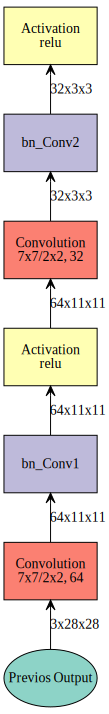

In [42]:
#ConvFactory() 함수를 이용하여 2개의 Convolution 레이어로 구성된 네트워크를 아래와 같이 구성
prev = mx.symbol.Variable(name="Previos Output")
conv_comp1 = ConvFactory(data=prev, num_filter=64, kernel=(7, 7), stride=(2, 2), name='Conv1')
conv_comp2 = ConvFactory(data=conv_comp1, num_filter=32, kernel=(7, 7), stride=(2, 2), name='Conv2')
shape = {"Previos Output": (128, 3, 28, 28)}
mx.viz.plot_network(symbol=conv_comp2, shape=shape)

### computation graph 저장 및 로드
* 구성한 그래프는 JSON 형태로 저장하고, 로드하여 재사용 가능

In [43]:
# Load and save computation graph
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a + b
c.save('symbol-b.json') #JSON 형태로 저장
c2 = mx.symbol.load('symbol-b.json') #모델 로드
print(c.tojson() == c2.tojson())

True


## 3. Module - Neural network training and inference

### mx.mod.Module을 이용한 훈련하기
: 텐서플로우와 마찬가지로 저수준 API와 고수준 API 제공

#### 그래프 구성하기

In [44]:
# 먼저 학습할 데이터셋을 로드한다.
# data: Letter Image Recognition Data(26 classes, A~Z)
import logging
logging.getLogger().setLevel(logging.INFO)
import mxnet as mx
import numpy as np

fname = mx.test_utils.download('http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data')
data = np.genfromtxt(fname, delimiter=',')[:,1:]
label = np.array([ord(l.split(',')[0])-ord('A') for l in open(fname, 'r')])

batch_size = 32
ntrain = int(data.shape[0]*0.8) #train:val = 8:2

#NDArrayIter : 데이터 Batch Iterator 생성
train_iter = mx.io.NDArrayIter(data[:ntrain, :], label[:ntrain], batch_size, shuffle=True) 
val_iter = mx.io.NDArrayIter(data[ntrain:, :], label[ntrain:], batch_size)

INFO:root:letter-recognition.data exists, skipping download


In [45]:
data

array([[  2.,   8.,   3., ...,   8.,   0.,   8.],
       [  5.,  12.,   3., ...,   8.,   4.,  10.],
       [  4.,  11.,   6., ...,   7.,   3.,   9.],
       ..., 
       [  6.,   9.,   6., ...,  12.,   2.,   4.],
       [  2.,   3.,   4., ...,   9.,   5.,   8.],
       [  4.,   9.,   6., ...,   7.,   2.,   8.]])

In [46]:
data.shape

(20000, 16)

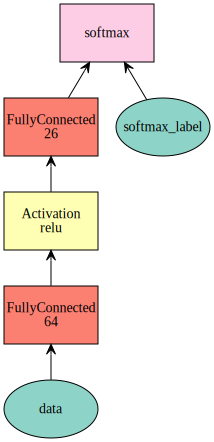

In [47]:
# 신경망 그래프를 구성
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(net, name='fc1', num_hidden=64)
net = mx.sym.Activation(net, name='relu1', act_type="relu")
net = mx.sym.FullyConnected(net, name='fc2', num_hidden=26)
net = mx.sym.SoftmaxOutput(net, name='softmax')
mx.viz.plot_network(net)

* ‘data’: 입력값을 가리키는 key
* ‘softmax_label’: 출력 레이블을 가리키는 key
* ‘softmax_output’: 모델의 예측값을 가리키는 key
* ‘opname_varname’: 모델의 파라미터를 가리키는 key

In [52]:
print(net.list_arguments())
print(net.list_outputs())

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias', 'softmax_label']
['softmax_output']


#### Module : 아래의 상태 단계 별로 진행

* 초기 상태 : 
  * 심볼 기반의 그래프만 존재하며 메모리가 할당되지 않은 상태
  * 계산(computation)이 실행될 수 없는 상태
* 데이터 바인딩 상태 :
  * 입력, 출력, 파라미터 등에 대해 메모리가 할당된 상태
  * 계산(computation)이 실행될 수 있는 상태
* 파라미터 초기화 상태 : 
  * 훈련 과정의 최적화를 위해 파라미터를 적절한 값으로 초기화환 상태
  * 옵티마이저 할당 상태
* 옵티마이저가 할당된 상태 : 
  * 계산(computation)을 반복적으로 실행하여 파라미터를 업데이트 할 수 있는 상태

### 1) Intermediate-level Interface
* These APIs give developers **flexibility** to do step-by-step computation by running forward and backward passes. 
* It’s also useful for debugging.

In [53]:
## module 학습 위해서는 아래의 단계 거쳐야 함.
#(1)Create Module
# symbol : the network Symbol(신경망 그래프)
# context : the device (or a list of devices) for execution(훈련 모드 : CPU/GPU)
# data_names : the list of data variable names(훈련 데이터 X의 key 값)
# label_names : the list of label variable names(훈련데이터 Y의 key 값(레이블))
mod = mx.mod.Module(symbol=net,
                    context=mx.cpu(),
                    data_names=['data'],
                    label_names=['softmax_label'])

In [54]:
# (2) 데이터 바인딩 : input data와 label에 따른 memory 할당
mod.bind(data_shapes=train_iter.provide_data, label_shapes=train_iter.provide_label)
# (3) 파라미터 초기화 상태 : Assigns and initializes parameters.
mod.init_params(initializer=mx.init.Uniform(scale=.1))
# (4) 옵티마이저 할당 : Initializes optimizers. Defaults to sgd.
mod.init_optimizer(optimizer='sgd', optimizer_params=(('learning_rate', 0.1), ))
# (5) Creates evaluation metric
metric = mx.metric.create('acc')

In [55]:
# train 10 epochs
for epoch in range(10):
    train_iter.reset()
    metric.reset()
    for batch in train_iter:
        mod.forward(batch, is_train=True)       # Forward computation.
        mod.update_metric(metric, batch.label)  # Evaluates and accumulates evaluation metric
        mod.backward()                          # Backward computation.
        mod.update()                            # update parameters
    print('Epoch %d, Training %s' % (epoch, metric.get()))

Epoch 0, Training ('accuracy', 0.44612499999999999)
Epoch 1, Training ('accuracy', 0.65131249999999996)
Epoch 2, Training ('accuracy', 0.71768750000000003)
Epoch 3, Training ('accuracy', 0.75431250000000005)
Epoch 4, Training ('accuracy', 0.7724375)
Epoch 5, Training ('accuracy', 0.79525000000000001)
Epoch 6, Training ('accuracy', 0.80925000000000002)
Epoch 7, Training ('accuracy', 0.81925000000000003)
Epoch 8, Training ('accuracy', 0.82706250000000003)
Epoch 9, Training ('accuracy', 0.83618749999999997)


### 2) High-level Interface
* Module also provides high-level APIs for training, predicting and evaluating for **user convenience**
* fit() 함수 이용

#### (1) train

In [56]:
# reset train_iter to the beginning
train_iter.reset()

# create a module(동일)
mod = mx.mod.Module(symbol=net,
                    context=mx.cpu(),
                    data_names=['data'],
                    label_names=['softmax_label'])

# fit the module
mod.fit(train_iter,
        eval_data=val_iter,
        optimizer='sgd',
        optimizer_params={'learning_rate':0.1},
        eval_metric='acc',
        num_epoch=10)
# 각 에폭이 끝날 때 마다 validation set 의 accuracy도 계산됨.

INFO:root:Epoch[0] Train-accuracy=0.370188
INFO:root:Epoch[0] Time cost=0.352
INFO:root:Epoch[0] Validation-accuracy=0.617500
INFO:root:Epoch[1] Train-accuracy=0.628750
INFO:root:Epoch[1] Time cost=0.295
INFO:root:Epoch[1] Validation-accuracy=0.690750
INFO:root:Epoch[2] Train-accuracy=0.701375
INFO:root:Epoch[2] Time cost=0.268
INFO:root:Epoch[2] Validation-accuracy=0.766750
INFO:root:Epoch[3] Train-accuracy=0.746250
INFO:root:Epoch[3] Time cost=0.265
INFO:root:Epoch[3] Validation-accuracy=0.773500
INFO:root:Epoch[4] Train-accuracy=0.769563
INFO:root:Epoch[4] Time cost=0.271
INFO:root:Epoch[4] Validation-accuracy=0.779750
INFO:root:Epoch[5] Train-accuracy=0.792188
INFO:root:Epoch[5] Time cost=0.278
INFO:root:Epoch[5] Validation-accuracy=0.776750
INFO:root:Epoch[6] Train-accuracy=0.805063
INFO:root:Epoch[6] Time cost=0.422
INFO:root:Epoch[6] Validation-accuracy=0.803000
INFO:root:Epoch[7] Train-accuracy=0.816312
INFO:root:Epoch[7] Time cost=0.368
INFO:root:Epoch[7] Validation-accuracy=0

#### (2) Predict and Evaluate

In [59]:
# predict
y = mod.predict(val_iter)
assert y.shape == (4000, 26)

In [60]:
print(y.shape)

(4000, 26)


In [61]:
print(y[0].asnumpy())

[  6.67226908e-04   7.58538628e-03   1.75329784e-04   3.97842057e-04
   3.77875149e-05   1.96039127e-06   3.94954495e-02   3.33127985e-03
   5.67132815e-07   3.14889485e-06   1.12999824e-03   5.79085099e-05
   4.67386954e-02   4.52895678e-04   2.03699595e-03   2.99512548e-03
   2.27701585e-05   9.66484775e-04   5.28426312e-07   1.48907895e-06
   5.39539278e-01   4.13565896e-02   3.12916905e-01   2.03440376e-10
   8.83944667e-05   1.17190202e-10]


In [62]:
# Predcit iteratively(Batch별 metric)
for preds, i_batch, batch in mod.iter_predict(val_iter):
    pred_label = preds[0].asnumpy().argmax(axis=1)
    label = batch.label[0].asnumpy().astype('int32')
    print('batch %d, accuracy %f' % (i_batch, float(sum(pred_label==label))/len(label)))

batch 0, accuracy 0.781250
batch 1, accuracy 0.781250
batch 2, accuracy 0.812500
batch 3, accuracy 0.906250
batch 4, accuracy 0.906250
batch 5, accuracy 0.906250
batch 6, accuracy 0.781250
batch 7, accuracy 0.687500
batch 8, accuracy 0.937500
batch 9, accuracy 0.718750
batch 10, accuracy 0.875000
batch 11, accuracy 0.781250
batch 12, accuracy 0.625000
batch 13, accuracy 0.781250
batch 14, accuracy 0.875000
batch 15, accuracy 0.906250
batch 16, accuracy 0.843750
batch 17, accuracy 0.781250
batch 18, accuracy 0.843750
batch 19, accuracy 0.875000
batch 20, accuracy 0.843750
batch 21, accuracy 0.843750
batch 22, accuracy 0.781250
batch 23, accuracy 0.750000
batch 24, accuracy 0.750000
batch 25, accuracy 0.812500
batch 26, accuracy 0.843750
batch 27, accuracy 0.812500
batch 28, accuracy 0.875000
batch 29, accuracy 0.843750
batch 30, accuracy 0.718750
batch 31, accuracy 0.781250
batch 32, accuracy 0.812500
batch 33, accuracy 0.812500
batch 34, accuracy 0.781250
batch 35, accuracy 0.781250
ba

In [63]:
# Evaluation metric: top_k_acc(top-k-accuracy), F1, RMSE, MSE, MAE, ce(CrossEntropy).
score = mod.score(val_iter, ['mse','acc']) 
score

[('mse', 211.26472070312499), ('accuracy', 0.79725000000000001)]

#### (3)  Save and Load
* 학습이 진행되는 동안 각 에폭별로 체크포인트 생성

In [64]:
# model save
# construct a callback function to save checkpoints
model_prefix = 'mx_mlp'
checkpoint = mx.callback.do_checkpoint(model_prefix)

mod = mx.mod.Module(symbol=net)
mod.fit(train_iter, num_epoch=10, epoch_end_callback=checkpoint)

INFO:root:Epoch[0] Train-accuracy=0.084500
INFO:root:Epoch[0] Time cost=0.305
INFO:root:Saved checkpoint to "mx_mlp-0001.params"
INFO:root:Epoch[1] Train-accuracy=0.270875
INFO:root:Epoch[1] Time cost=0.338
INFO:root:Saved checkpoint to "mx_mlp-0002.params"
INFO:root:Epoch[2] Train-accuracy=0.440437
INFO:root:Epoch[2] Time cost=0.254
INFO:root:Saved checkpoint to "mx_mlp-0003.params"
INFO:root:Epoch[3] Train-accuracy=0.551312
INFO:root:Epoch[3] Time cost=0.249
INFO:root:Saved checkpoint to "mx_mlp-0004.params"
INFO:root:Epoch[4] Train-accuracy=0.614750
INFO:root:Epoch[4] Time cost=0.248
INFO:root:Saved checkpoint to "mx_mlp-0005.params"
INFO:root:Epoch[5] Train-accuracy=0.651375
INFO:root:Epoch[5] Time cost=0.249
INFO:root:Saved checkpoint to "mx_mlp-0006.params"
INFO:root:Epoch[6] Train-accuracy=0.679375
INFO:root:Epoch[6] Time cost=0.257
INFO:root:Saved checkpoint to "mx_mlp-0007.params"
INFO:root:Epoch[7] Train-accuracy=0.697250
INFO:root:Epoch[7] Time cost=0.245
INFO:root:Saved che

In [66]:
# 에폭별 체크포인트 파일과 모델에 대한 symbol.json 파일이 생성됨.
! ls -al mx_mlp*

-rw-r--r--  1 hyemin  staff  11372  1  9 00:14 mx_mlp-0001.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0002.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0003.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0004.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0005.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0006.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0007.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0008.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0009.params
-rw-r--r--  1 hyemin  staff  11372  1  9 00:15 mx_mlp-0010.params
-rw-r--r--  1 hyemin  staff   1432  1  9 00:15 mx_mlp-symbol.json


In [67]:
#model load
#저장된 체크포인트 파일에 대해 에폭번호를 지정하여 로드
#로드하는 항목은 모델(sym), 파라미터(arg_params), 부가 파라미터(aux_params)로 구성됨.
sym, arg_params, aux_params = mx.model.load_checkpoint(model_prefix, 9) #epoch = 9 model load

assert sym.tojson() == net.tojson() 

In [68]:
# 로드한 파라미터를 초기값으로 이용하여 9 epoch 이후부터 training 가능
mod.set_params(arg_params, aux_params)

In [69]:
mod = mx.mod.Module(symbol=sym)
mod.fit(train_iter,
        num_epoch=20,
        arg_params=arg_params,
        aux_params=aux_params,
        begin_epoch=9)

INFO:root:Epoch[9] Train-accuracy=0.720625
INFO:root:Epoch[9] Time cost=0.323
INFO:root:Epoch[10] Train-accuracy=0.729437
INFO:root:Epoch[10] Time cost=0.298
INFO:root:Epoch[11] Train-accuracy=0.736625
INFO:root:Epoch[11] Time cost=0.259
INFO:root:Epoch[12] Train-accuracy=0.744125
INFO:root:Epoch[12] Time cost=0.261
INFO:root:Epoch[13] Train-accuracy=0.751250
INFO:root:Epoch[13] Time cost=0.355
INFO:root:Epoch[14] Train-accuracy=0.757687
INFO:root:Epoch[14] Time cost=0.297
INFO:root:Epoch[15] Train-accuracy=0.763250
INFO:root:Epoch[15] Time cost=0.246
INFO:root:Epoch[16] Train-accuracy=0.768000
INFO:root:Epoch[16] Time cost=0.319
INFO:root:Epoch[17] Train-accuracy=0.773750
INFO:root:Epoch[17] Time cost=0.326
INFO:root:Epoch[18] Train-accuracy=0.778438
INFO:root:Epoch[18] Time cost=0.273
INFO:root:Epoch[19] Train-accuracy=0.783813
INFO:root:Epoch[19] Time cost=0.277
